In [25]:
import sys
import pandas as pd
import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append("..") # adds twitter_sentiment path

In [3]:
from twitter_sentiment.preprocessors.utils import read_jsonlines_lzma
from twitter_sentiment.preprocessors.distant_supervision import extract_tweets_tokenized_text_and_Y

In [4]:
distant_dataset = "../data/output/all_dedup-pt-tagged.jsonline.xz"
tweets = read_jsonlines_lzma(distant_dataset)
_, X_raw, Y = extract_tweets_tokenized_text_and_Y(tweets)

In [17]:
nb = joblib.load("../models/all-pt-nb.pickle")
nb_vectorizer = joblib.load("../models/all-pt-nb-vectorizer.pickle")

In [20]:
svm = joblib.load("../models/all-pt-svm.pickle")
svm_vectorizer = joblib.load("../models/all-pt-svm-vectorizer.pickle")

In [21]:
X_nb = nb_vectorizer.transform(X_raw)
Y_pred_nb = nb.best_estimator_.predict_proba(X_nb)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(Y, Y_pred_nb)

In [23]:
X_svm = svm_vectorizer.transform(X_raw)
Y_pred_svm = svm.predict_proba(X_svm)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(Y, Y_pred_svm)

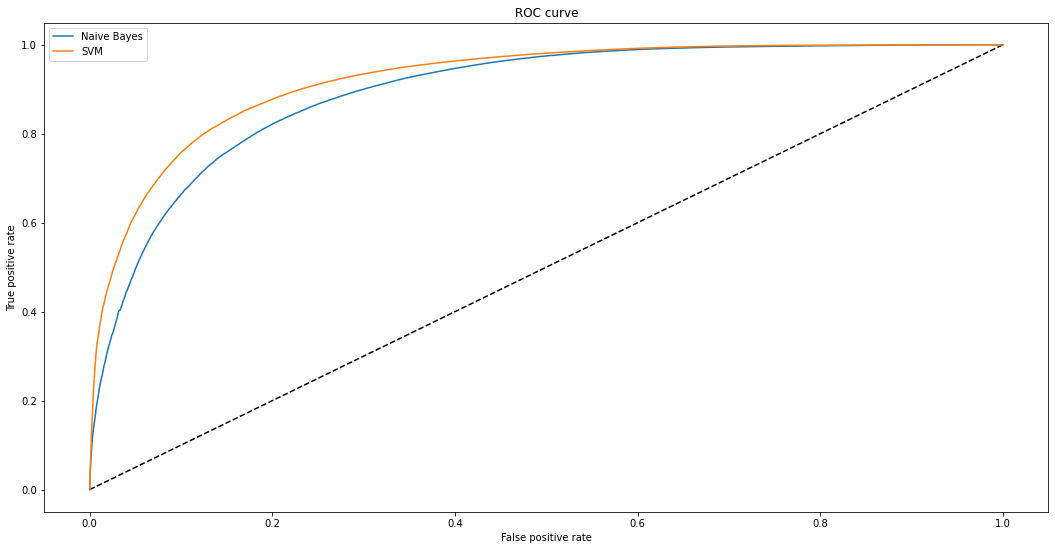

In [24]:
plt.figure(figsize=(18,9))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [56]:
plt.figure?

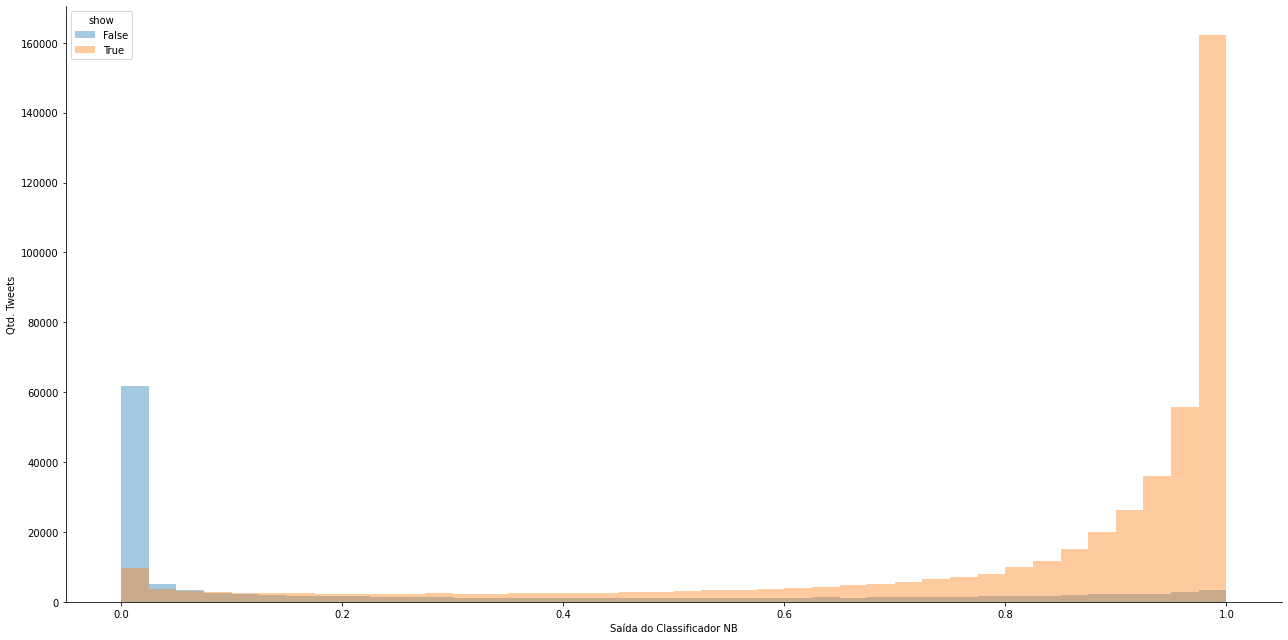

In [36]:
prob_dist = pd.DataFrame({"prob": Y_pred_nb, "label": Y.astype("bool")})

ax = sns.FacetGrid(prob_dist, hue="label", size=9, aspect=2)
ax = ax.map(sns.distplot, "prob", bins=40, kde=False)
plt.legend(title="show")
plt.xlabel("Saída do Classificador NB")
plt.ylabel("Qtd. Tweets")
plt.tight_layout()
plt.show()

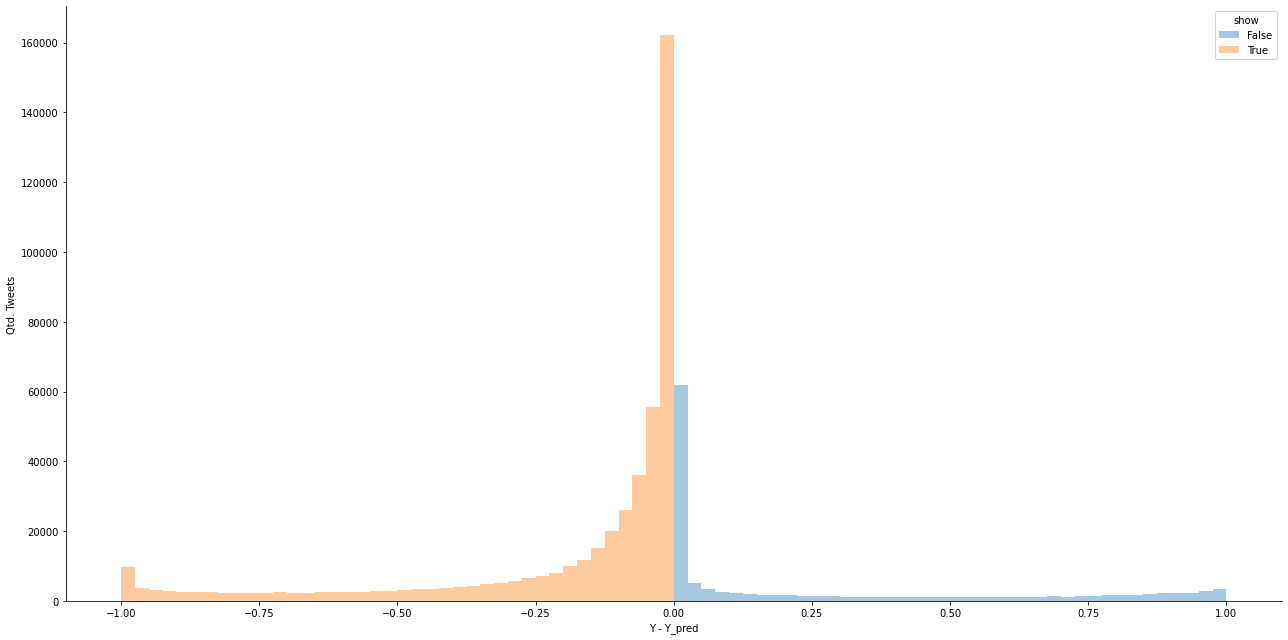

In [38]:
loss = (Y_pred_nb - Y)
prob_dist = pd.DataFrame({"loss": loss, "label": Y.astype("bool")})

ax = sns.FacetGrid(prob_dist, hue="label", size=9, aspect=2)
ax = ax.map(sns.distplot, "loss", bins=40, kde=False)
plt.legend(title="show")
plt.xlabel("Y - Y_pred")
plt.ylabel("Qtd. Tweets")
plt.tight_layout()
plt.show()